### Analysis of PBH simulations


In [1]:
import numpy as np
import h5py as h5
import scipy.constants as const
import scipy.special as special
from scipy.special import erfc
from scipy.interpolate import interp1d
import scipy.integrate as integrate
from scipy.integrate import dblquad
import scipy.optimize as opt



import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update({'font.size': 12,'font.family':'serif'})
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rc('text', usetex=True)
mpl.rcParams['legend.edgecolor'] = 'inherit'


datadir = "/Users/cjoana/data"
sims = ["asym01", "asym02","asym03", "asym04",
        "pancake","pancake02", "Yoo081"]

sumfiles = [ datadir + f'/{sim}_summary.hdf5'for sim in sims ]
ahfiles = [ datadir + f'/{sim}_ahfinder.hdf5'for sim in sims ]



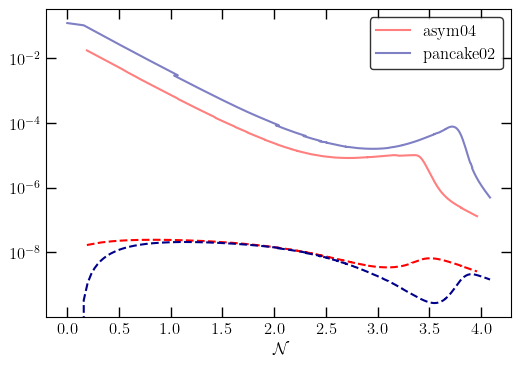

In [2]:
colors = ["green", 'orange', 'gold', "red", "blue", "darkblue" , 'gray' ]
skip_sims = [0,1,2,4, 6]

def get_tevolv(var, qnt, simpath):
    f5 = h5.File(simpath, "r")
    time = f5["metadata/time"][:]
    yvar = f5["simulated_data"][var][qnt][:]
    return time, yvar 

def get_Nevolv(var, qnt, simpath):
    f5 = h5.File(simpath, "r")
    # eos = f5["simulated_data"]["omega"][0][:]
    # n0ind = np.where(eos>=-1/3)[0][0]
    x = f5["simulated_data"]["N"][5][:]
    # x = x - x[n0ind]
    yvar = f5["simulated_data"][var][qnt][:]
    return x, yvar 


fig, axs = plt.subplots(1,1, figsize=(6,4))

var, qnt = [
    "rho",  3
    ]

for i_s, simpath in enumerate(sumfiles): 
    if i_s in skip_sims : continue
    x, y = get_Nevolv(var, qnt, simpath)
    y = np.abs(y)
    x = x - x[0]
    axs.plot(x[1:],y[1:], label=sims[i_s], color=colors[i_s], ls="-", alpha=0.5)

    var2 = "trA2"
    qnt2 = 0
    x, y = get_Nevolv(var2, qnt2, simpath)
    y = np.abs(y) / (8*np.pi)
    x = x - x[0]
    # y[y<1e-12] = 3e-3
    axs.plot(x[1:],y[1:], color=colors[i_s], ls="--")

    axs.set_yscale("log")
    # axs.set_xscale("log")
    axs.set_xlabel(r"$\cal N$")
    axs.legend()



asym02 59
asym04 89
pancake02 239
Yoo081 52


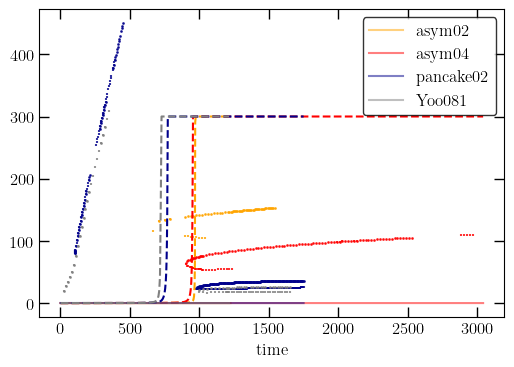

In [3]:
colors = ["green", 'orange', 'gold', "red", "blue", "darkblue" , "gray" ]
skip_sims = [0,2,4]

def get_tevolv(var, qnt, simpath):
    f5 = h5.File(simpath, "r")
    time = f5["metadata/time"][:]
    yvar = f5["simulated_data"][var][qnt][:]
    return time, yvar 

def get_Nevolv(var, qnt, simpath):
    f5 = h5.File(simpath, "r")
    # eos = f5["simulated_data"]["omega"][0][:]
    # n0ind = np.where(eos>=-1/3)[0][0]
    x = f5["simulated_data"]["N"][5][:]
    # x = x - x[n0ind]
    yvar = f5["simulated_data"][var][qnt][:]
    return x, yvar 

def get_tBHv(var, simpath):
    f5 = h5.File(simpath, "r")
    time = f5["ahdata1/time"][:]
    yvar = f5["ahdata1"][var][:]
    t2 = f5["ahdata2/time"][:]
    yvar2 = f5["ahdata2"][var][:]
    return time, yvar , t2,  yvar2



fig, axs = plt.subplots(1,1, figsize=(6,4))

var, qnt = [
    "rho",  3
    ]

for i_s, simpath in enumerate(sumfiles):
    
    if i_s in skip_sims : continue
    x, y = get_tevolv(var, qnt, simpath)
    y = np.abs(y)
    x = x #- x[0]
    axs.plot(x[1:],y[1:], label=sims[i_s], color=colors[i_s], ls="-", alpha=0.5)

    var2 = "deltarho"
    x, y = get_tevolv(var2, qnt, simpath)
    # y = np.abs(y) / y.max()
    y[y>300] = 300
    x = x #- x[0]
    # y[y<1e-12] = 3e-3
    axs.plot(x[1:],y[1:], color=colors[i_s], ls="--")

    ahvar = 'mass'
    x, y, x2, y2 = get_tBHv(ahvar, ahfiles[i_s])
    y = np.abs(y) 
    x = x #- x[0]
    # y[y<1e-12] = 3e-3
    axs.scatter(x[:],y[:], color=colors[i_s], marker="o", s=1, alpha=0.8)
    axs.scatter(x2[:],y2[:], color=colors[i_s], marker="|", s=1,alpha=0.8)
    print(sims[i_s], len(y))


    # axs.set_yscale("log")
    # axs.set_xscale("log")
    axs.set_xlabel(r" time")
    axs.legend()



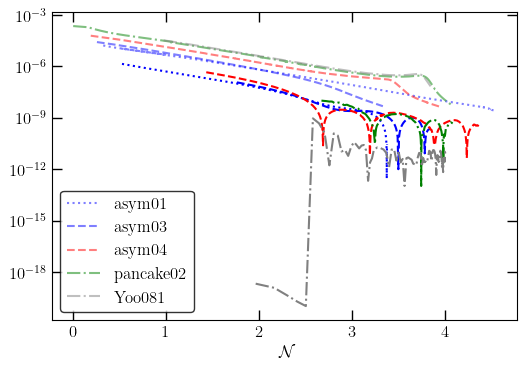

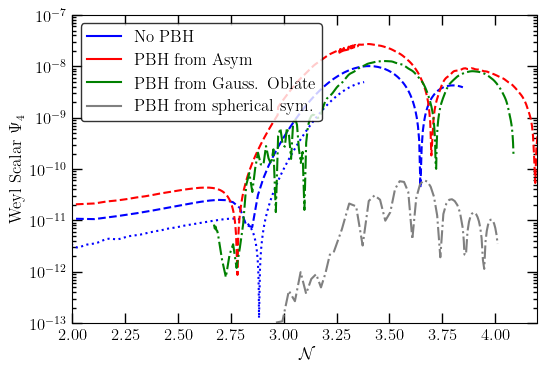

In [4]:
colors = ["blue", 'orange', 'gold', "red", "blue", "green" , "gray" ]
colors = ["blue", 'red', 'blue', "red", "blue", "green" ,  "gray"  ]
skip_sims = [1,20,4]

lns = ["dotted", "dotted", "--", "--", "-.", "-.", "-."]

def get_tevolv(var, qnt, simpath):
    f5 = h5.File(simpath, "r")
    time = f5["metadata/time"][:]
    yvar = f5["simulated_data"][var][qnt][:]
    return time, yvar 

def get_Nevolv(var, qnt, simpath):
    f5 = h5.File(simpath, "r")
    # eos = f5["simulated_data"]["omega"][0][:]
    # n0ind = np.where(eos>=-1/3)[0][0]
    x = f5["simulated_data"]["N"][5][:]
    # x = x - x[n0ind]
    yvar = f5["simulated_data"][var][qnt][:]
    return x, yvar 


fig, axs = plt.subplots(1,1, figsize=(6,4))

var, qnt ,qnt2 = [
    "rho",  1,
    4
    ]

for i_s, simpath in enumerate(sumfiles): 
    if i_s in skip_sims : continue
    x, y = get_Nevolv(var, qnt, simpath)
    y = np.abs(y)
    x = x - x[0]
    axs.plot(x[1:],y[1:], label=sims[i_s], color=colors[i_s], ls=lns[i_s], alpha=0.5)

    var2 = "Weyl4_Re"
    # qnt2 = 5
    x, y = get_Nevolv(var2, qnt2, ahfiles[i_s])
    y = np.abs(y) / (8*np.pi)
    # x = x - x[0]
    # y[y<1e-12] = 3e-3
    axs.plot(x[1:],y[1:], color=colors[i_s], ls=lns[i_s])


    axs.set_yscale("log")
    # axs.set_xscale("log")
    axs.set_xlabel(r"$\cal N$")
    axs.legend()


fig, axs = plt.subplots(1,1, figsize=(6,4))




var, qnt ,qnt2 = [
    "deltarho",  1,
    5
    ]
ini =0
for i_s, simpath in enumerate(sumfiles): 
    if i_s in skip_sims : continue
    x, y = get_Nevolv(var, qnt,  simpath)
    # x, y = get_Nevolv(var, qnt, ahfiles[i_s])
    # y =  np.abs( y - x )
    y = np.abs(y)
    x0 = x[0]
    x = x - x0
    # axs.plot(x[5:],y[5:], label=sims[i_s], color=colors[i_s], ls="-", alpha=0.5)

    var2 = "Weyl4_Re"
    # qnt2 = 5
    x, y = get_Nevolv(var2, qnt2, ahfiles[i_s])
    y = np.abs(y) 
    # x = x - x0
    axs.plot(x[ini:],y[ini:], color=colors[i_s], ls=lns[i_s])

    axs.set_yscale("log")
    # axs.set_xscale("log")
    axs.set_xlabel(r"$\cal N$")
    axs.set_ylabel(r"Weyl Scalar $\Psi_4$")
    axs.set_xlim(2,4.2)
    axs.set_ylim(1e-13,1e-7)

axs.axhline(1, color="b", label="No PBH")
axs.axhline(1, color="r", label="PBH from Asym")
axs.axhline(1, color="g", label="PBH from Gauss. Oblate")
axs.axhline(1, color="gray", label="PBH from spherical sym.")
axs.legend(loc=2)

colors = ["blue", 'orange', 'gold', "red", "blue", "green" , "gray" ]
skip_sims = [0,2,4]

def get_tevolv(var, qnt, simpath):
    f5 = h5.File(simpath, "r")
    time = f5["metadata/time"][:]
    yvar = f5["simulated_data"][var][qnt][:]
    return time, yvar 

def get_Nevolv(var, qnt, simpath):
    f5 = h5.File(simpath, "r")
    # eos = f5["simulated_data"]["omega"][0][:]
    # n0ind = np.where(eos>=-1/3)[0][0]
    x = f5["simulated_data"]["N"][5][:]
    # x = x - x[n0ind]
    yvar = f5["simulated_data"][var][qnt][:]
    return x, yvar 

def get_tBHv(var, simpath):
    f5 = h5.File(simpath, "r")
    time = f5["ahdata1/time"][:]
    yvar = f5["ahdata1"][var][:]
    t2 = f5["ahdata2/time"][:]
    yvar2 = f5["ahdata2"][var][:]
    return time, yvar , t2,  yvar2



from scipy.optimize import curve_fit, fsolve, root

fig, axs = plt.subplots(1,1, figsize=(6,4))

var, qnt = [
    "rho",  3
    ]

ints= [50 ,5, 10, 2]

cnt=-1
for i_s, simpath in enumerate(sumfiles):
    if i_s in skip_sims : continue
    
    cnt=cnt+1
    # ax = axs[cnt]
    
    if cnt==0: continue

    tN, N = get_tevolv("N", 0, sumfiles[i_s])
    N_f = interp1d(tN, N)
    

    
    ax=axs
    ahvar = 'mass'
    x, y, x2, y2 = get_tBHv(ahvar, ahfiles[i_s])
    
    # if i_s == 6 :      x, y = [x2, y2]    
    if True : # i_s == 2: 
        # x[-2] = 1400
        # x[-1] = 1400
        # y[-1] *= 1.0
        print(i_s)


    y = np.abs(y) 
    x = x #- x[0]
    # y[y<1e-12] = 3e-3

    # axs.axvline(800)
    mask = (x>600)
    y = y[mask]
    x = x[mask]

    t_form = x[0]
    time, K = get_tevolv("K", 0, sumfiles[i_s])
    maskt = (time>= t_form)
    H_cross =  -3/(K[maskt])[0]
    M_Hx = 0.5 * H_cross
    
    print(y[0], M_Hx, t_form )

    # y = y / M_Hx

    ii = ints[cnt]

    # axs.scatter(x[:],y[:], color=colors[i_s], marker="o", s=1, alpha=0.8, label = sims[i_s])
    # ax.scatter(x[:],y[:], color=colors[i_s], marker="+", s=30, alpha=0.2)
    
    if False: #cnt==2 :
        print(len(x2))
        
        ini, end = [ 10, 30]
        # ax.plot(x2[ini:end], y2[ini:end], "k+", alpha=0.8)
        func = lambda x,a,b: a + x*b
        popt, pcov = curve_fit(
            f= func,       # model function
            xdata= x2[ini:end],   # x data
            ydata= y2[ini:end],   # y data
            #p0=(3, -2),      # initial value of the parameters
            sigma= np.ones_like(y[ini:end]) *0.1  # uncertainties on y
        )
        a,b = popt
        XX = np.linspace(50, 1000, 1000)
        ax.plot(XX, func(XX,a,b), "k-", alpha=0.8)


    PA = lambda x, a0, a1, a2, a3, b1,b2,  b3 :  (a0 + a1 * x + a2 * x*x + a3* x*x*x) / (1 + b1 *x + b2*x*x + b3*x*x*x) 
    ini, end = [ 0, -1]
    popt, pcov = curve_fit(
        f=PA,       # model function
        xdata=x[ini:end],   # x data
        ydata=y[ini:end],   # y data
        #p0=(3, -2),      # initial value of the parameters
        sigma= np.ones_like(y[ini:end]) *0.1  # uncertainties on y
    )
    a0, a1, a2, a3, b1, b2, b3 = popt
    func = lambda xx: PA(xx, a0, a1, a2, a3,  b1, b2, b3  )
    sol = x[ini]
    while func(sol)>0: sol-= 0.1

    xini =  sol + 1/10 * (x[ini] - sol) 
    xx = np.linspace(xini, 4000, 1000 )
    #ax.plot(xx, PA(xx, a0, a1, a2, a3,  b1, b2, b3  ), color=colors[i_s], ls="--", lw=0.8  ,label=f"M$_{{\\rm end}} $= {a3/b3:.1f} ,  {a3/b3 / y[0] :.1f}, form : {sol:.1f} ")
    fnc = lambda xx: PA(xx, a0, a1, a2, a3,  b1, b2, b3  )
    if i_s == 3: 
        ax.plot(xx, fnc(xx), color=colors[i_s], ls="--", lw=0.8  ,label=f"M$_{{\\rm end}} $= {fnc(5000):.1f} ,  $M_0/M_{{\\rm end}}$  : { fnc(10000)/ y[0] :.1f}" )  # , form : {sol:.1f} ")
    
    


    PA = lambda x, a0, a1, a2, b1,b2 :  (a0 + a1 * x + a2 * x*x ) / (1 + b1 *x + b2*x*x ) 
    ini, end = [ 0, -1]
    popt, pcov = curve_fit(
        f=PA,       # model function
        xdata=x[ini:end],   # x data
        ydata=y[ini:end],   # y data
        #p0=(3, -2),      # initial value of the parameters
        sigma= np.ones_like(y[ini:end]) *0.1  # uncertainties on y
    )
    a0, a1, a2, b1, b2 = popt
    func = lambda xx: PA(xx, a0, a1, a2,  b1, b2 )
    sol = x[ini]
    while func(sol)>0: sol-= 0.1

    if not i_s == 3:
        xini =  sol + 1/10 * (x[ini] - sol) 
        xx = np.linspace(xini, 4000, 1000 )
        # ax.plot(xx, PA(xx, a0, a1, a2, b1, b2 ), color=colors[i_s], ls="--", lw=0.8  ,label=f"M$_{{\\rm end}} $= {a2/b2:.1f} ,  {a2/b2 / y[0] :.1f}, form : {sol:.1f} ")
        fnc = lambda xx: PA(xx, a0, a1, a2,  b1, b2 )
        #ax.plot(xx, fnc(xx), color=colors[i_s], ls="--", lw=0.8  ,label=f"M$_{{\\rm end}} $= {fnc(5000):.1f} ,  ratio : { fnc(10000)/ y[0] :.1f}" )  # , form : {sol:.1f} ")
        ax.plot(xx, fnc(xx), color=colors[i_s], ls="--", lw=0.8  ,label=f"M$_{{\\rm end}} $= {a2/b2:.1f} ,  $M_0/M_{{\\rm end}}$ : { a2/b2/ y[0] :.1f}" )  # , form : {sol:.1f} ")
        





    if cnt==0: 
        xx = np.linspace(x[end]+50, 1870, 7 )
        ax.plot(xx, PA(xx, a0, a1, a2, a3,  b1, b2, b3  ) + (np.random.rand(len(xx))-0.48)*1, ".", color=colors[i_s]) 
    
    
    xxx, yyy = get_tevolv("K", 0, sumfiles[i_s])
    yyy = 0.5 * 3/np.abs(yyy)
    # x = x - x[0]
    # y[y<1e-12] = 3e-3
    if cnt==2 : axs.plot(xxx[1:],yyy[1:], "-k")

    #PLOT DATA

    ax.plot(x[::ii],y[::ii], ".", color=colors[i_s],   )
    ax.plot(x[:4],y[:4], ".", color=colors[i_s]   )
  
    print(sims[i_s], len(y))



    
        
        
        
X = np.linspace(100,3000,100)
ax.plot(X, -100+ 0*X, "k-", label="$M_{\\rm Hubble}$")  # out of scope




ax.set_xlabel(r" time")
ax.set_ylabel(r" Mass")
ax.legend(loc=1)
# ax.set_xlim(500, 2800)

ax.set_ylim(-0.5, 250)
# ax.set_yscale("log")

ax.set_xlim(0, 3000)
# ax.set_xscale("log")



132.15943615 681.4395472439202 707.5833333334
64.886999768 888.7578720912975 904.1666666663
24.949685644 968.7050169518399 979.1666666663
21.625554035 887.0788304102472 1000.0000000001


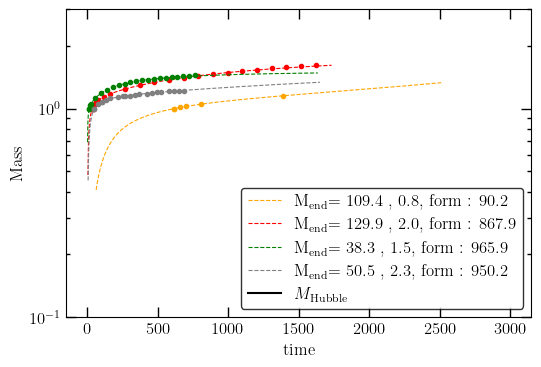

In [9]:
colors = ["blue", 'orange', 'gold', "red", "blue", "green" , "gray" ]
skip_sims = [0,2,4]

def get_tevolv(var, qnt, simpath):
    f5 = h5.File(simpath, "r")
    time = f5["metadata/time"][:]
    yvar = f5["simulated_data"][var][qnt][:]
    return time, yvar 

def get_Nevolv(var, qnt, simpath):
    f5 = h5.File(simpath, "r")
    # eos = f5["simulated_data"]["omega"][0][:]
    # n0ind = np.where(eos>=-1/3)[0][0]
    x = f5["simulated_data"]["N"][5][:]
    # x = x - x[n0ind]
    yvar = f5["simulated_data"][var][qnt][:]
    return x, yvar 

def get_tBHv(var, simpath):
    f5 = h5.File(simpath, "r")
    time = f5["ahdata1/time"][:]
    yvar = f5["ahdata1"][var][:]
    t2 = f5["ahdata2/time"][:]
    yvar2 = f5["ahdata2"][var][:]
    return time, yvar , t2,  yvar2



from scipy.optimize import curve_fit, fsolve, root

fig, axs = plt.subplots(1,1, figsize=(6,4))

var, qnt = [
    "rho",  3
    ]

ints= [50 ,5, 10, 2]

cnt=-1
for i_s, simpath in enumerate(sumfiles):
    if i_s in skip_sims : continue
    
    cnt=cnt+1
    # ax = axs[cnt]
    
    # if cnt==0: continue
    
    ax=axs
    ahvar = 'mass'
    x, y, x2, y2 = get_tBHv(ahvar, ahfiles[i_s])
    
    # if i_s == 6 :      x, y = [x2, y2]    
    # if i_s == 6: 
        # # x[-2] = 1400
        # x[-1] = 1500


    y = np.abs(y) 
    # y[y<1e-12] = 3e-3

    # axs.axvline(800)
    mask = (x>600)
    y = y[mask]
    x = x[mask]

    # x = x - x[0]

    t_form = x[0]
    time, K = get_tevolv("K", 0, sumfiles[i_s])
    maskt = (time>= t_form)
    H_cross =  -3/(K[maskt])[0]
    M_Hx = 0.5 * H_cross
    
    print(y[0], M_Hx, t_form )

    # y = y / M_Hx

    ii = ints[cnt]

    # axs.scatter(x[:],y[:], color=colors[i_s], marker="o", s=1, alpha=0.8, label = sims[i_s])
    # ax.scatter(x[:],y[:], color=colors[i_s], marker="+", s=30, alpha=0.2)
    
    if False: #cnt==2 :
        print(len(x2))
        
        ini, end = [ 10, 30]
        # ax.plot(x2[ini:end], y2[ini:end], "k+", alpha=0.8)
        func = lambda x,a,b: a + x*b
        popt, pcov = curve_fit(
            f= func,       # model function
            xdata= x2[ini:end],   # x data
            ydata= y2[ini:end],   # y data
            #p0=(3, -2),      # initial value of the parameters
            sigma= np.ones_like(y[ini:end]) *0.1  # uncertainties on y
        )
        a,b = popt
        XX = np.linspace(50, 1000, 1000)
        ax.plot(XX, func(XX,a,b), "k-", alpha=0.8)


    off = 0 
    norm = 0
    off = x[0]
    norm = y[0]



  

    PA = lambda x, a0, a1, a2, a3, b1,b2,  b3 :  (a0 + a1 * x + a2 * x*x + a3* x*x*x) / (1 + b1 *x + b2*x*x + b3*x*x*x) 
    ini, end = [ 0, 60]
    popt, pcov = curve_fit(
        f=PA,       # model function
        xdata=x[ini:end],   # x data
        ydata=y[ini:end],   # y data
        #p0=(3, -2),      # initial value of the parameters
        sigma= np.ones_like(y[ini:end]) *0.1  # uncertainties on y
    )
    # print(popt)
    a0, a1, a2, a3, b1, b2, b3 = popt
    func = lambda xx: PA(xx, a0, a1, a2, a3,  b1, b2, b3  )
    # sol = root(func, x[0])
    # print(sol.x)
    # sol =sol.x[0]
    sol = x[ini]
    while func(sol)>0: sol-= 0.01

    off = sol

    # Plot Solution
    xini =  sol + 1/10 * (x[ini] - sol) 
    xx = np.linspace(xini, 2600, 1000 )
    ax.plot(xx - off, PA(xx, a0, a1, a2, a3,  b1, b2, b3) /norm , color=colors[i_s], ls="--", lw=0.8  ,label=f"M$_{{\\rm end}} $= {a3/b3:.1f} ,  {a3/b3 / y[0] :.1f}, form : {sol:.1f} ")
    # axs.plot(x, PA(x, a0, a1, a2, a3,  b1, b2, b3  ), color=colors[i_s], label=f"M$_{{\\rm end}} $= {PA(10000000, a0, a1, a2, a3,  b1, b2, b3  ) :.1f}")
    

    # Plot DATA
    ax.plot(x[::ii] - off  ,y[::ii]/norm, ".", color=colors[i_s],   )
    ax.plot(x[:4] -off  ,y[:4]/norm, ".", color=colors[i_s]   )
       
        
        
X = np.linspace(100,3000,100)
ax.plot(X, 0 + 0*X, "k-", label="$M_{\\rm Hubble}$")  # out of scope




ax.set_xlabel(r" time")
ax.set_ylabel(r" Mass")
ax.legend(loc=4)
# ax.set_xlim(500, 2800)

ax.set_ylim(0.1, 3)
ax.set_yscale("log")

# ax.set_xlim(0.8, 1000)
# ax.set_xscale("log")



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


asym02 59
asym04 89
pancake02 239
Yoo081 52
asym02 52
asym04 52
pancake02 52
Yoo081 52


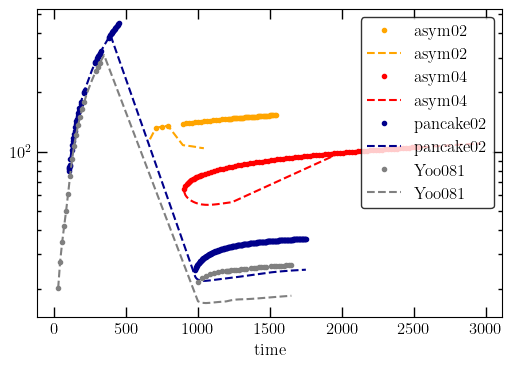

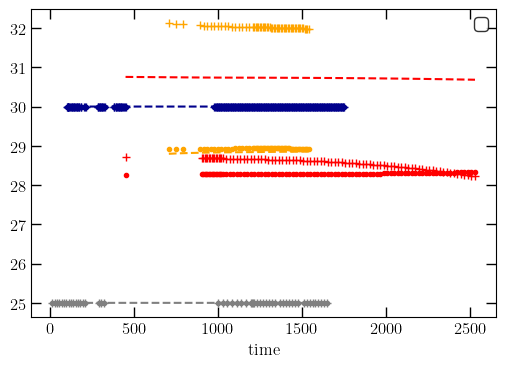

In [7]:
colors = ["green", 'orange', 'gold', "red", "blue", "darkblue", "gray"  ]
skip_sims = [0,2, 4]

def get_tevolv(var, qnt, simpath):
    f5 = h5.File(simpath, "r")
    time = f5["metadata/time"][:]
    yvar = f5["simulated_data"][var][qnt][:]
    return time, yvar 

def get_Nevolv(var, qnt, simpath):
    f5 = h5.File(simpath, "r")
    # eos = f5["simulated_data"]["omega"][0][:]
    # n0ind = np.where(eos>=-1/3)[0][0]
    x = f5["simulated_data"]["N"][5][:]
    # x = x - x[n0ind]
    yvar = f5["simulated_data"][var][qnt][:]
    return x, yvar 

def get_tBHv(var, simpath):
    f5 = h5.File(simpath, "r")
    time = f5["ahdata1/time"][:]
    yvar = f5["ahdata1"][var][:]
    t2 = f5["ahdata2/time"][:]
    yvar2 = f5["ahdata2"][var][:]
    return time, yvar , t2,  yvar2



from scipy.optimize import curve_fit, fsolve, root

fig, axs = plt.subplots(1,1, figsize=(6,4))

var, qnt = [
    "rho",  3
    ]

ints= [50 ,5, 10]

cnt=-1
for i_s, simpath in enumerate(sumfiles):
    if i_s in skip_sims : continue
    
    cnt=cnt+1
    # ax = axs[cnt]
    ax=axs
    ahvar = 'mass'
    x, my, x2, my2 = get_tBHv(ahvar, ahfiles[i_s])

    ahvar = 'spin'
    x, y, x2, y2 = get_tBHv(ahvar, ahfiles[i_s])

    y = np.abs(y) / my
    x = x #- x[0]
    # y[y<1e-12] = 3e-3

    # axs.axvline(800)
    mask = (x>0)
    y = y[mask]
    x = x[mask]

    ii = 1

    ax.plot(x[::ii],my[::ii], ".", color=colors[i_s],  label=sims[i_s] )
    ax.plot(x2[::ii],my2[::ii], "--", color=colors[i_s],  label=sims[i_s] )
 
    print(sims[i_s], len(y))
  


    ax.set_yscale("log")
    # ax.set_xscale("log")
    ax.set_xlabel(r" time")
    ax.legend()
    # ax.set_xlim(500, 2800)
    # ax.set_ylim(1e-5, 1)




fig, axs = plt.subplots(1,1, figsize=(6,4))

var, qnt = [
    "rho",  3
    ]

ints= [50 ,5, 10]

cnt=-1
for i_s, simpath in enumerate(sumfiles):
    if i_s in skip_sims : continue
    
    cnt=cnt+1
    # ax = axs[cnt]
    ax = axs  # [cnt]
    ahvar = 'center_x'
    x, Xy, _, _ = get_tBHv(ahvar, ahfiles[i_s])

    ahvar = 'center_y'
    x, Yy, x2, y2 = get_tBHv(ahvar, ahfiles[i_s])

    ahvar = 'center_z'
    x, Zy, x2, y2 = get_tBHv(ahvar, ahfiles[i_s])

    # y = np.abs(y) / my
    # x = x #- x[0]
    # y[y<1e-12] = 3e-3

    # axs.axvline(800)
    # mask = (x>0)
    # y = y[mask]
    # x = x[mask]

    ii = 1

    ax.plot(x[::ii],Xy[::ii], ".", color=colors[i_s] )
    ax.plot(x[::ii],Yy[::ii], "--", color=colors[i_s] )
    ax.plot(x[::ii],Zy[::ii], "+", color=colors[i_s] )
 
    print(sims[i_s], len(y))
  


    # ax.set_yscale("log")
    # ax.set_xscale("log")
    ax.set_xlabel(r" time")
    ax.legend()
    # ax.set_xlim(500, 2800)
    # ax.set_ylim(1e-5, 1)




